<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/Logistic_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [372]:
from zipfile import ZipFile
dataset='/content/Cardiovascular_Disease_Dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [373]:
import pandas as pd
df=pd.read_csv('/content/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [374]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


<ipython-input-375-1d9d2f356383>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

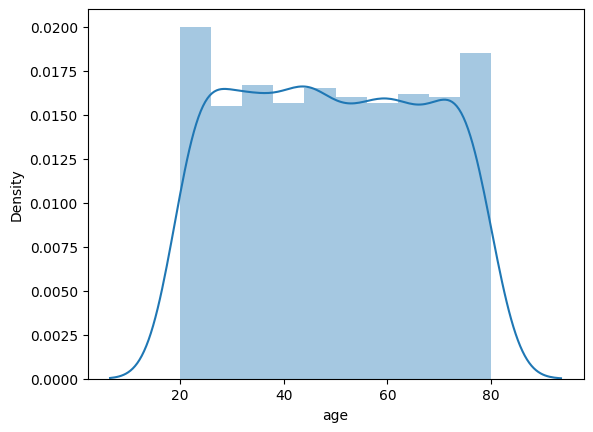

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df.age)

In [376]:
df.shape

(1000, 14)

In [377]:
#data standardization
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [378]:
print(df)

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [379]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [380]:
#x=df.drop(['target'],axis=1)
x=df.drop(columns=['target','patientid'],axis=1)
y=df['target']

In [381]:
x

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2
996,47,1,3,143,258,1,1,98,1,5.7,1,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2


In [382]:
print(x)

     age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       1          2        171                0                  0   
1     40       1          0         94              229                  0   
2     49       1          2        133              142                  0   
3     43       1          0        138              295                  1   
4     31       1          1        199                0                  0   
..   ...     ...        ...        ...              ...                ...   
995   48       1          2        139              349                  0   
996   47       1          3        143              258                  1   
997   69       1          0        156              434                  1   
998   45       1          1        186              417                  0   
999   25       1          0        158              270                  0   

     restingrelectro  maxheartrate  exerciseangia  oldpeak  slo

In [383]:
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64


In [384]:
#splitting the data in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=3)

In [385]:
x_train

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
19,35,1,0,127,269,0,0,87,1,3.8,0,1
796,63,1,3,195,347,1,2,107,0,2.4,2,1
116,45,1,0,160,475,0,1,163,0,5.0,2,1
84,55,1,0,99,132,0,0,102,0,4.1,0,0
892,33,1,2,156,545,1,2,105,1,2.3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
381,42,1,2,177,249,1,1,187,0,4.8,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2
309,66,1,3,198,472,1,0,148,0,2.6,2,2
809,75,1,3,198,241,1,1,136,1,1.0,1,2


In [386]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 12) (800, 12) (200, 12)


In [387]:
print(df.std())

patientid            2.895905e+06
age                  1.786473e+01
gender               4.242110e-01
chestpain            9.531571e-01
restingBP            2.996523e+01
serumcholestrol      1.324438e+02
fastingbloodsugar    4.567194e-01
restingrelectro      7.701228e-01
maxheartrate         3.419027e+01
exerciseangia        5.002462e-01
oldpeak              1.720753e+00
slope                1.003697e+00
noofmajorvessels     9.775846e-01
target               4.938055e-01
dtype: float64


In [388]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [389]:
x_train_standerd= scaler.transform(x_train)

In [390]:
print(x_train_standerd)

[[-0.81497576  0.54074681 -1.04333777 ...  0.63991001 -1.55034744
  -0.25683275]
 [ 0.74372104  0.54074681  2.13031324 ... -0.18265307  0.46145783
  -0.25683275]
 [-0.25829833  0.54074681 -1.04333777 ...  1.34496408  0.46145783
  -0.25683275]
 ...
 [ 0.91072427  0.54074681  2.13031324 ... -0.06514406  0.46145783
   0.77049825]
 [ 1.41173396  0.54074681  2.13031324 ... -1.00521615 -0.5444448
   0.77049825]
 [-0.75930801 -1.84929433 -1.04333777 ... -1.24023417 -1.55034744
  -0.25683275]]


In [391]:
x_test_standerd=scaler.transform(x_test)

In [392]:
print(x_train_standerd.std())

1.0


In [393]:
print(x_test_standerd.std())

1.024326063521326


In [394]:
df['target'].value_counts()

,count
target,
1,580
0,420


In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= LogisticRegression()

In [396]:
model.fit(x_train_standerd,y_train)

LogisticRegression()

In [397]:
import joblib

# Save the first trained model
joblib.dump(model, "original_model.pkl")


['original_model.pkl']

In [398]:
# Step 1: Save the previously fitted scaler (after training the first model)
joblib.dump(scaler, "scaler.pkl")  # Save scaler to a file

# Step 2: Load the same scaler when using a new training dataset
scaler = joblib.load("scaler.pkl")

In [399]:
#acuracy score_train data
x_train_prediction=model.predict(x_train_standerd)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [400]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.96625


In [401]:
#acuracy score_test data
x_test_prediction=model.predict(x_test_standerd)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [402]:
print('accuracy on test data:',test_data_accuracy)

accuracy on test data: 0.965


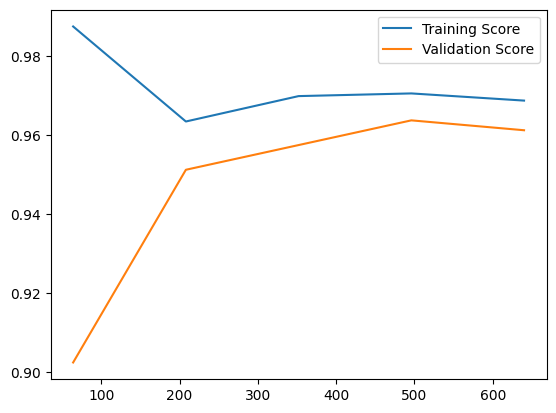

In [403]:
#learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model,x_train_standerd, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.legend()
plt.show()


In [404]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [0.9875     0.96346154 0.96988636 0.97056452 0.96875   ]
Validation Scores: [0.9025  0.95125 0.9575  0.96375 0.96125]
Model is performing well (good fit).


In [405]:
#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, x_train_standerd, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.96


In [406]:
df2=pd.read_csv('/content/cleaned_merged_heart_dataset.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [407]:
df2['target'].value_counts()

,count
target,
1,977
0,911


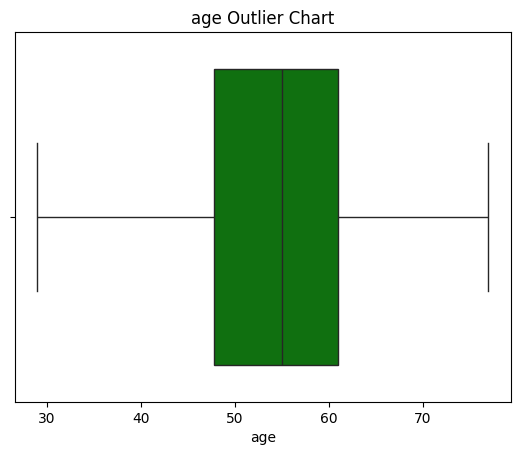

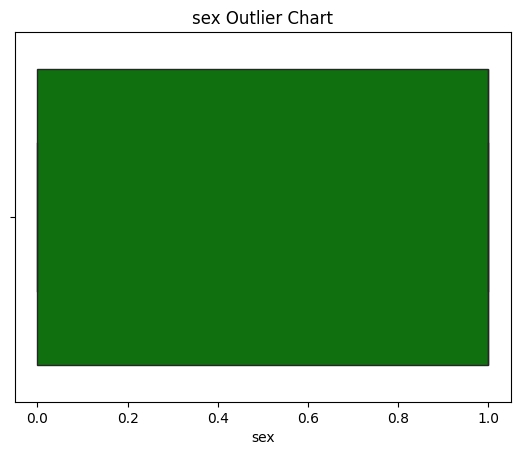

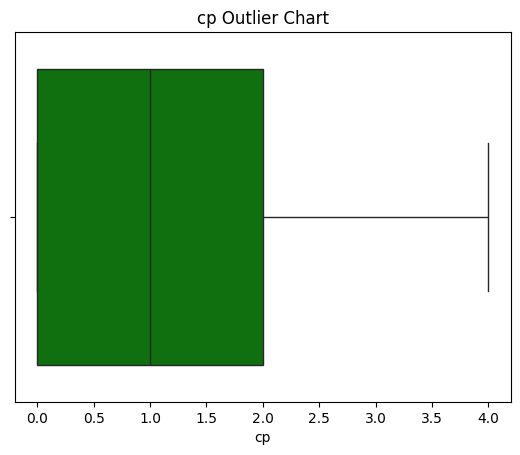

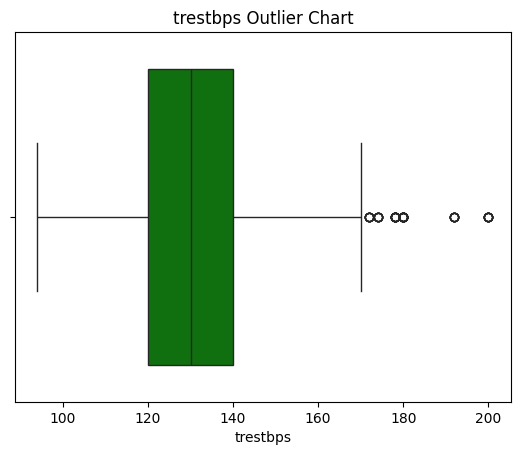

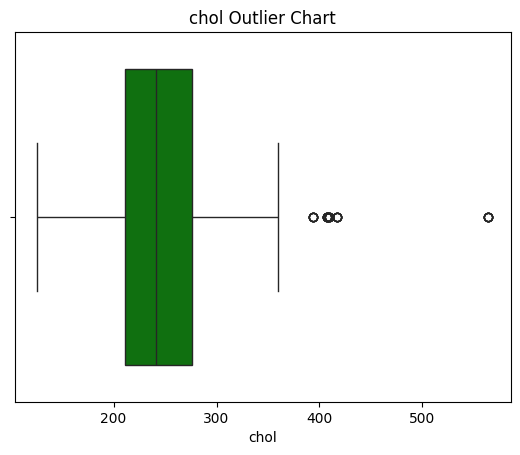

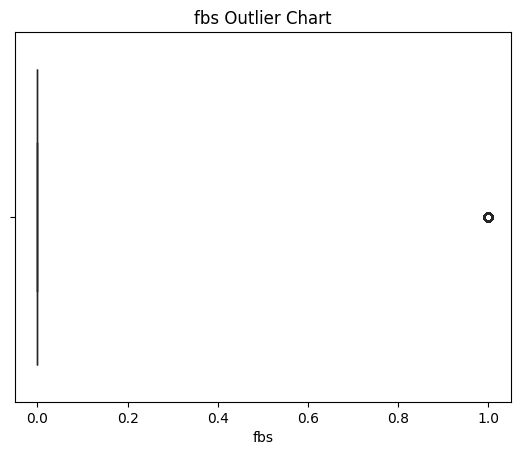

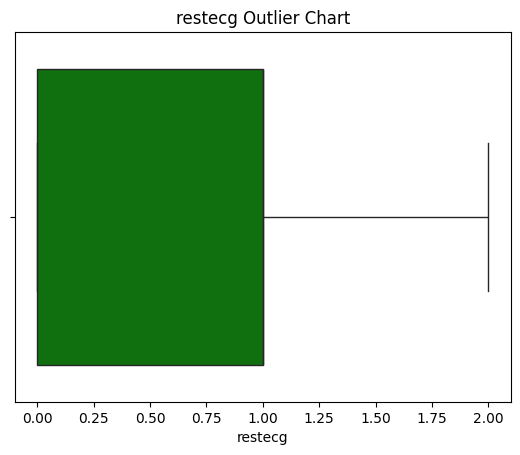

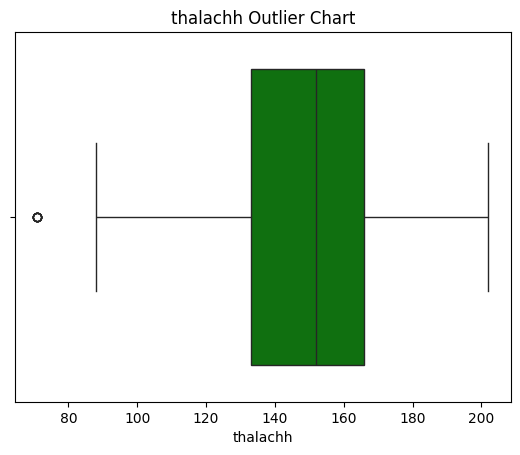

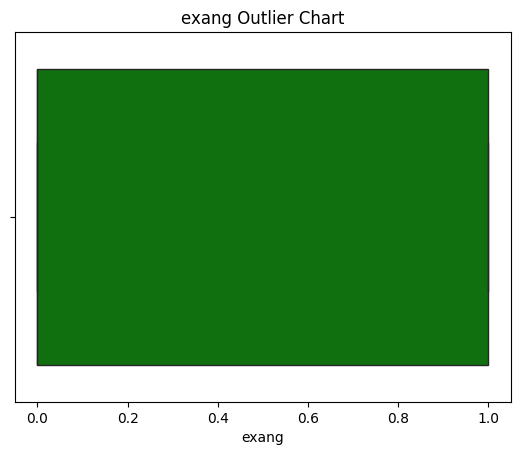

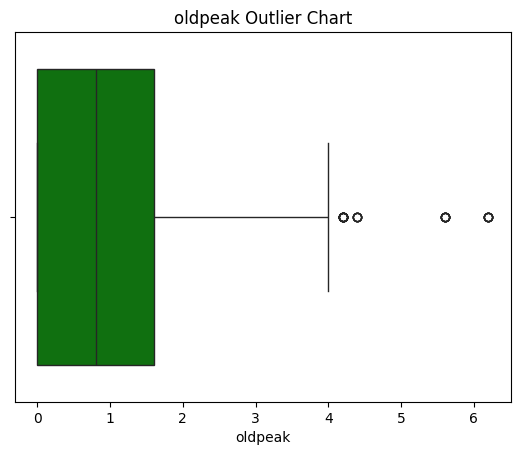

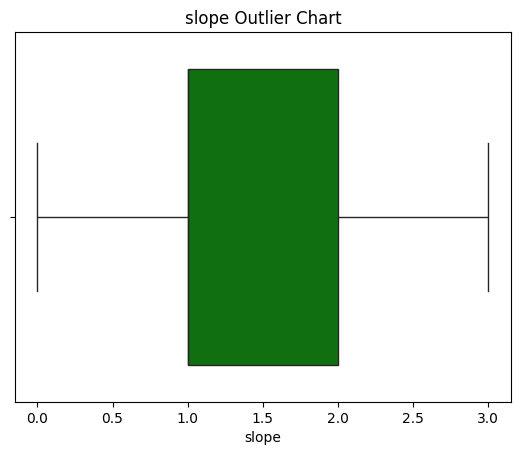

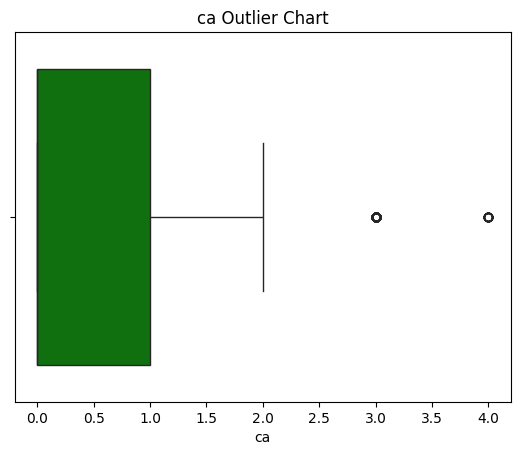

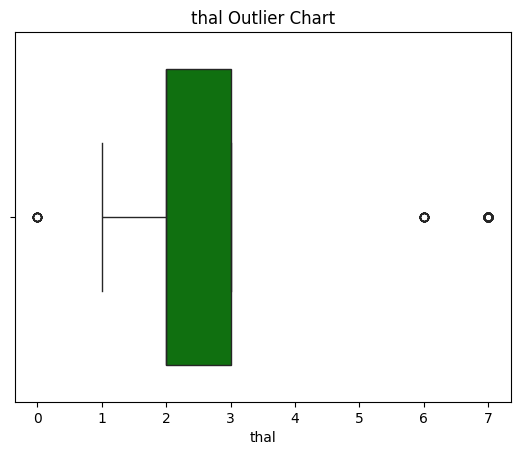

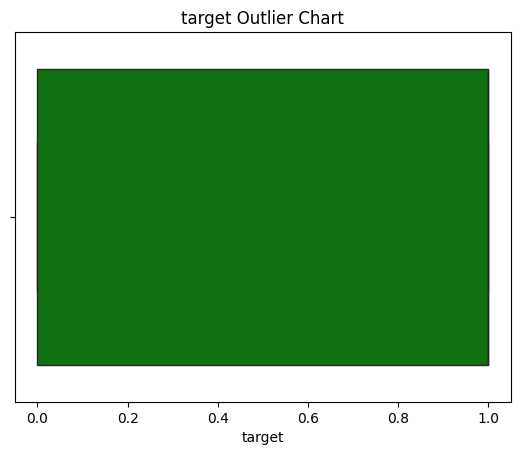

In [408]:
for col in df2.columns:
    sns.boxplot(data = df2, x = col, color = 'Green')  # Boxplot for detecting outliers
    plt.title(f'{col} Outlier Chart')  # Setting the title dynamically for each column
    plt.show()  # Display the plot

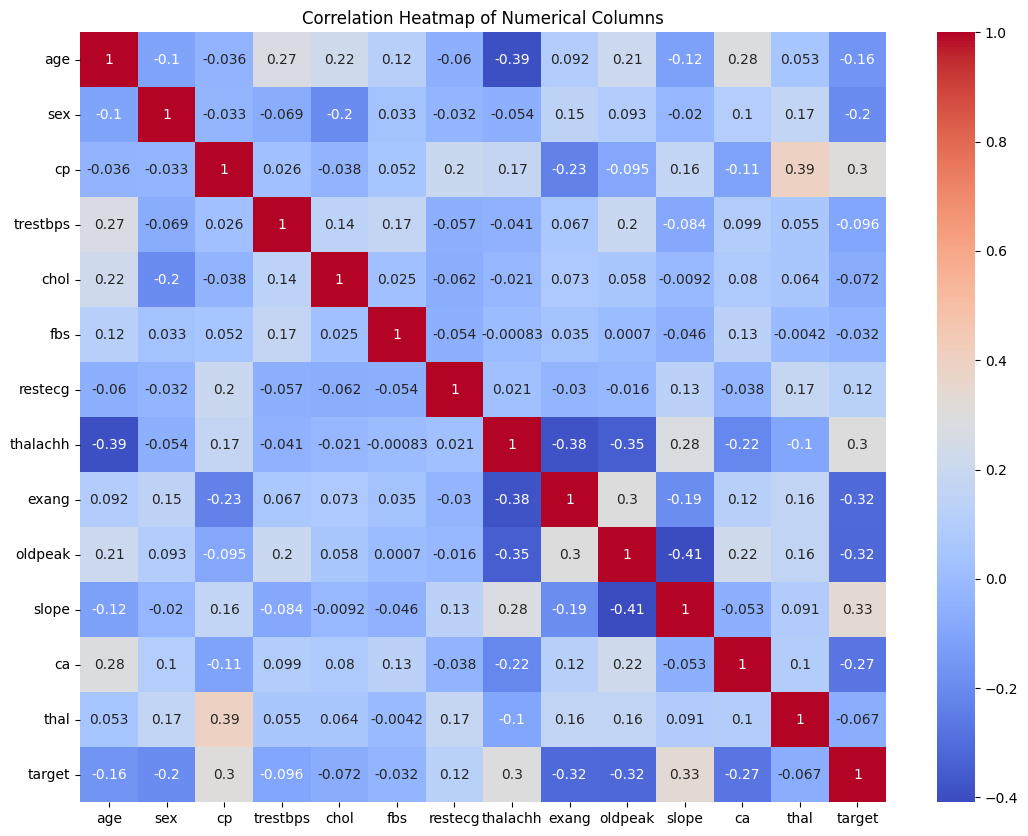

In [409]:
plt.figure(figsize=(13, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

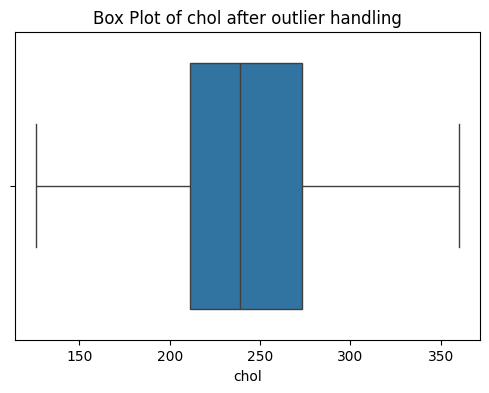

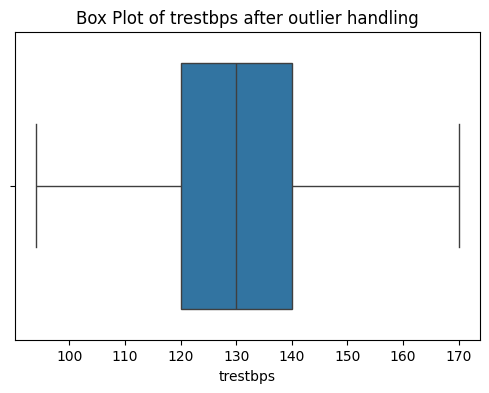

In [410]:
# Handling Outliers using IQR Method
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to the 'chol' column
df2 = handle_outliers_iqr(df2, column='chol')

# Apply the function to the 'trestbps' column
df2 = handle_outliers_iqr(df2, column='trestbps')

# Reset the index after removing outliers
df2 = df2.reset_index(drop=True)
# Verify the changes for 'chol' (optional)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['chol'])
plt.title('Box Plot of chol after outlier handling')
plt.show()

# Verify the changes for 'trestbps' (optional)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['trestbps'])
plt.title('Box Plot of trestbps after outlier handling')
plt.show()

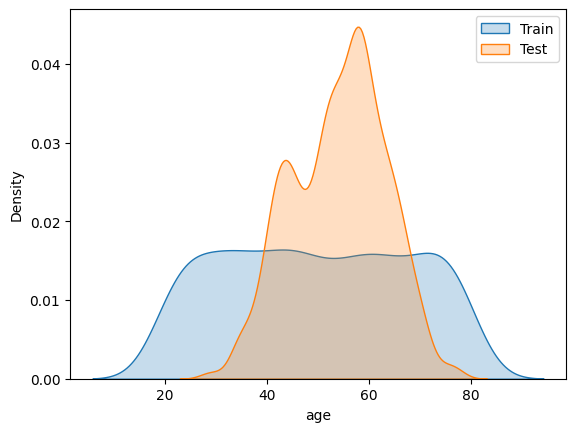

In [411]:
# Compare age distribution in both datasets
sns.kdeplot(x_train['age'], label="Train", fill=True)
sns.kdeplot(df2['age'], label="Test", fill=True)
plt.legend()
plt.show()


<Axes: >

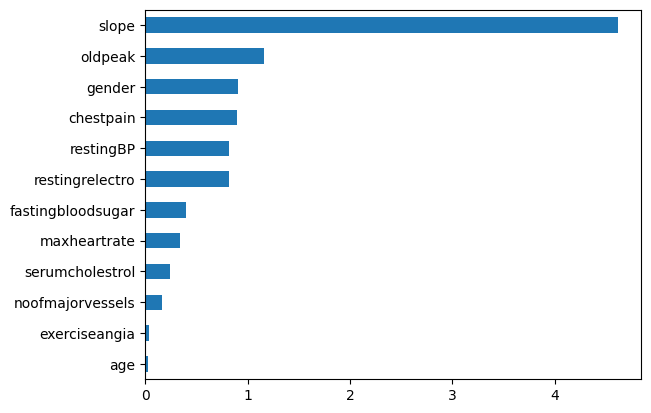

In [412]:

# Get feature importance (absolute coefficient values)
feature_importance = pd.Series(np.abs(model.coef_[0]), index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')


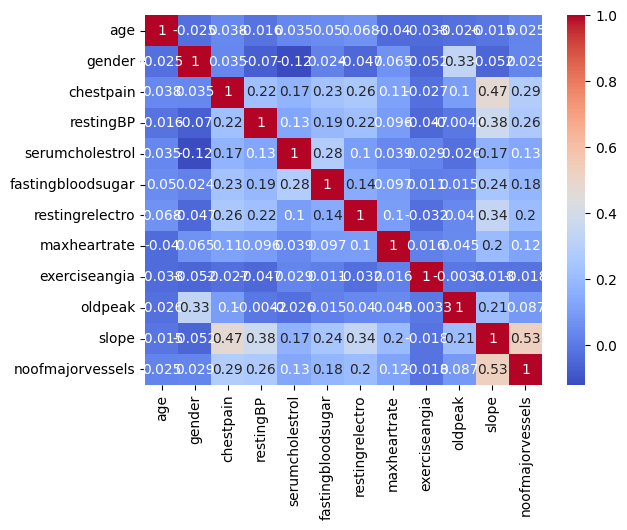

In [413]:
#compute co-relation matrix
corr_matrix = pd.DataFrame(x).corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [414]:
a=df2.drop(columns=['target','thal'],axis=1)
b=df2['target']

In [415]:
# Column mapping (reversed)
column_mapping = {
    "sex": "gender",
    "cp": "chestpain",
    "trestbps": "restingBP",
    "chol": "serumcholestrol",
    "fbs": "fastingbloodsugar",
    "restecg": "restingrelectro",
    "thalachh": "maxheartrate",
    "exang": "exerciseangia",
    "ca": "noofmajorvessels"
}

# Rename the columns in 'a' based on the mapping
a.rename(columns=column_mapping, inplace=True)

# Check if column names are updated
print(a.columns)


Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')


In [416]:
a.shape

(1800, 12)

In [417]:
b.shape

(1800,)

In [418]:
#spliting the new dataset
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,stratify=b, random_state=3)

In [419]:
b_train.value_counts()

,count
target,
1,657
0,603


In [420]:
a_train

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
1645,47,1,0,112,204,0,1,143,0,0.1,2,0
169,40,1,0,110,167,0,0,114,1,2.0,1,0
1629,50,0,0,110,254,0,0,159,0,0.0,2,0
1152,55,1,1,130,262,0,1,155,0,0.0,2,0
391,47,1,0,110,275,0,0,118,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
345,67,1,2,152,212,0,0,150,0,0.8,1,0
183,41,1,0,110,172,0,0,158,0,0.0,2,0
1072,61,1,0,140,207,0,0,138,1,1.9,2,1
1596,51,1,0,140,261,0,0,186,1,0.0,2,0


In [421]:
print("Feature order in training data:", list(a_train.columns))
print("Feature order in test data:", list(a_test.columns))


Feature order in training data: ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']
Feature order in test data: ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']


In [422]:
# Ensure the train and test sets are DataFrames before transforming
#a_train = pd.DataFrame(a_train, columns=scaler.feature_names_in_)
#a_test = pd.DataFrame(a_test, columns=scaler.feature_names_in_)
print(a_train)

      age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
1645   47       1          0        112              204                  0   
169    40       1          0        110              167                  0   
1629   50       0          0        110              254                  0   
1152   55       1          1        130              262                  0   
391    47       1          0        110              275                  0   
...   ...     ...        ...        ...              ...                ...   
345    67       1          2        152              212                  0   
183    41       1          0        110              172                  0   
1072   61       1          0        140              207                  0   
1596   51       1          0        140              261                  0   
576    55       0          1        132              342                  0   

      restingrelectro  maxheartrate  exerciseangia 

In [423]:
#scaling the features
# Step 3: Transform the new training dataset using the same scaler
#a_new_train_scaled = scaler.transform(a_train)  # ⚠️ Only use .transform(), not .fit_transform()
a_new_train_scaled = scaler.fit_transform(a_train)
a_new_test_scaled=scaler.transform(a_test)

In [424]:
print(a_new_train_scaled)
print(a_new_train_scaled.std())

[[-0.76011568  0.63491577 -0.97326842 ... -0.81966358  0.93764056
  -0.73028115]
 [-1.53169128  0.63491577 -0.97326842 ...  0.82944526 -0.68075274
  -0.73028115]
 [-0.42944043 -1.57501206 -0.97326842 ... -0.90645878  0.93764056
  -0.73028115]
 ...
 [ 0.7830355   0.63491577 -0.97326842 ...  0.74265006  0.93764056
   0.23932291]
 [-0.31921534  0.63491577 -0.97326842 ... -0.90645878  0.93764056
  -0.73028115]
 [ 0.12168499 -1.57501206 -0.18463935 ...  0.13508364  0.93764056
  -0.73028115]]
1.0


In [425]:
a_new_test_scaled.std()

0.9925462223093003

In [426]:
new_a_prediction=model.predict(a_new_train_scaled)
new_data_accuracy=accuracy_score(new_a_prediction,b_train)
print('accuracy on new test data with original model:',new_data_accuracy)

accuracy on new test data with original model: 0.6817460317460318


In [427]:
#Hyperperameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(a_new_train_scaled, b_train)
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 0.1}


In [428]:
# L2 regularization (Ridge) to prevent overfitting
model = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
#model = LogisticRegression()

In [429]:
#retraing the model on the new dataset
model.fit(a_new_train_scaled,b_train)

LogisticRegression(C=0.01, solver='liblinear')

In [430]:
#tesing the model on a and b of data frame 2
a_train_prediction=model.predict(a_new_train_scaled)
data_accuracy=accuracy_score(a_train_prediction,b_train)

In [431]:
print('accuracy on new train data:',data_accuracy)

accuracy on new train data: 0.765079365079365


In [432]:
a_test_prediction=model.predict(a_new_test_scaled)
data_accuracy=accuracy_score(a_test_prediction,b_test)
print('accuracy on new test data:',data_accuracy)

accuracy on new test data: 0.7129629629629629


In [433]:
#acuracy score_train on old data
x_train_prediction=model.predict(x_train_standerd)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on old train data:',training_data_accuracy)

accuracy on old train data: 0.69


In [434]:
# Perform cross-validation (5-fold)
cv_scores = cross_val_score(model, a_new_train_scaled, b_train, cv=5, scoring='accuracy')

# Print the mean accuracy from cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.77


In [435]:
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score, average='macro')
cv_f1_scores = cross_val_score(model, a_new_train_scaled, b_train, cv=5, scoring=f1_scorer)
print(f"Cross-Validation F1 Score: {cv_f1_scores.mean():.2f}")


Cross-Validation F1 Score: 0.76


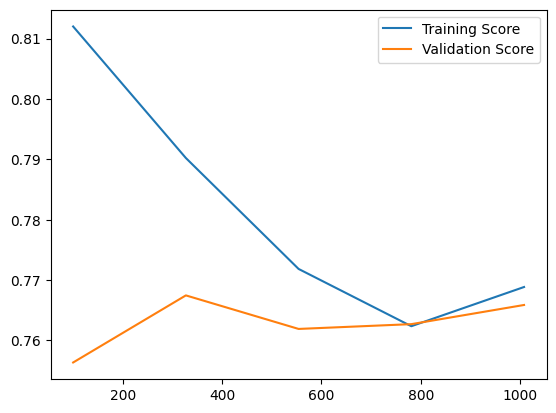

In [436]:
#learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model,a_new_train_scaled, b_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.legend()
plt.show()


In [437]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [0.812      0.79021407 0.77184116 0.76235595 0.76884921]
Validation Scores: [0.75634921 0.76746032 0.76190476 0.76269841 0.76587302]
Model is underfitting (high bias).
